In [92]:
import nsaba.nsaba as na
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import validation_curve
from tabulate import tabulate
import numpy as np
import scipy as sp
import random as rn

import matplotlib as mt
import matplotlib.pyplot as plt
mt.style.use('ggplot')
%matplotlib inline

In [2]:
dd = '../../data_dir'
na.Nsaba.aba_load(dd)
na.Nsaba.ns_load(dd)

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.



In [3]:
na.Nsaba.ns_load_id_dict()

This may take a minute or two ...


In [4]:
para = na.Nsaba()
para.load_ge_pickle('Nsaba_ABA_ge.pkl', dd)

This may take a minute or two ...
'ge' dictionary successfully loaded


In [5]:
feat_df = para.get_ns_struct("features_df")

# Term Activation

In [6]:
term = 'reward'
_, df = para._term_to_coords(term, -1)

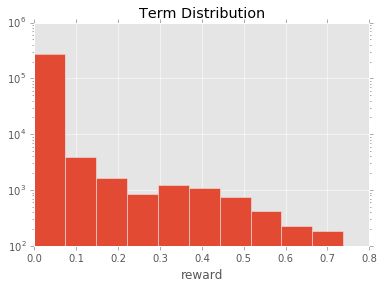

In [7]:
df.reward.hist(bins=10);
plt.title("Term Distribution");
plt.yscale('log')
plt.xlabel(term);

In [44]:
X = df.loc[:, 'x':'z'].as_matrix()
y = df.loc[:, 'reward'].as_matrix()

[[array([ 56., -34.,  26.]), 0.0],
 [array([ 46., -68.,   0.]), 0.0],
 [array([-40.6, -60.9,  42.9]), 0.0],
 [array([ 14., -66.,  66.]), 0.0],
 [array([ 42., -40.,  38.]), 0.38891951417699999],
 [array([-38., -52.,  34.]), 0.0],
 [array([-50., -44., -26.]), 0.0],
 [array([-63., -15.,  39.]), 0.0],
 [array([ -4., -60., -30.]), 0.0],
 [array([-48.,  54.,  -6.]), 0.0],
 [array([ 22., -66.,  28.]), 0.0],
 [array([ 14., -56.,  34.]), 0.0],
 [array([ 27.,   0.,  57.]), 0.0],
 [array([ 20., -25.,  53.]), 0.0],
 [array([ 6.,  8.,  2.]), 0.0],
 [array([-65., -31.,  15.]), 0.0],
 [array([-30.,  25.,  -6.]), 0.0],
 [array([-48., -40.,  30.]), 0.0],
 [array([-30., -52.,   4.]), 0.0],
 [array([-27., -45.,  -9.]), 0.0]]

In [97]:
# Validation Helpers
def plot_vc(pars, train_scores, valid_scores, score, par_name, model):
    plt.plot(pars, np.mean(train_scores,1), label="Train")
    plt.plot(pars, np.mean(valid_scores,1), label="Validation")
    plt.legend()
    plt.title("Validation Curve: %s" % model)
    plt.xlabel(par_name);
    plt.ylabel(score);
    
def print_score(pars, train_scores, valid_scores, par_name, error=False):
    entries = []
    if error:
        headers = [par_name, "Mean Training Error", "Mean CV Error"]
        t_means = -np.mean(train_scores,1)
        v_means = -np.mean(valid_scores,1)
        for par, t_err, v_err in zip(pars, t_means, v_means):
            entries.append([par, t_err, v_err]) 
    else:
        headers = [par_name, "Mean Training Score", "Mean CV Score"]
        t_means = np.mean(train_scores,1)
        v_means = np.mean(valid_scores,1)
        for par, t_err, v_err in zip(pars, t_means, v_means):
            entries.append([par, t_err, v_err]) 
    print tabulate(entries, headers=headers)

# Decision Tree

  Max Depth    Mean Training Score    Mean CV Score
-----------  ---------------------  ---------------
        500               0.748351         -1.0203
       1000               0.748351         -1.02537
      10000               0.748351         -1.02719
     100000               0.748351         -1.0306
    1000000               0.748351         -1.02524


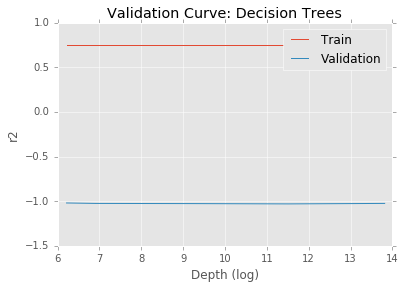

In [98]:
depth=[500,1000,10000,100000,1000000]
score = 'r2'

train_scores, valid_scores = validation_curve(DecisionTreeRegressor(),
                                              X, y, "max_depth", depth, 
                                              scoring=score, n_jobs=4, cv=10)
plot_vc(np.log(depth), train_scores, valid_scores, score, "Depth (log)", "Decision Trees")
print_score(depth, train_scores, valid_scores, "Max Depth")

  Max Depth    Mean Training Score    Mean CV Score
-----------  ---------------------  ---------------
        500           -0.000827079      -0.00634981
       1000           -0.000827079      -0.0063663
      10000           -0.000827079      -0.00637197
     100000           -0.000827079      -0.00638307
    1000000           -0.000827079      -0.00637138


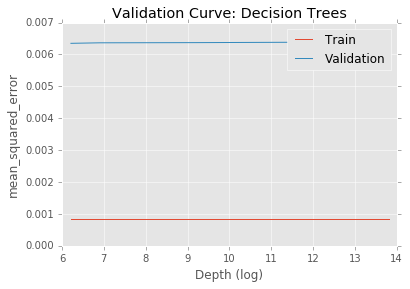

In [100]:
score = 'mean_squared_error'
train_scores, valid_scores = validation_curve(DecisionTreeRegressor(),
                                              X, y, "max_depth", depth, 
                                              scoring=score, n_jobs=4, cv=10)
plot_vc(np.log(depth), -train_scores, -valid_scores, score, "Depth (log)", "Decision Trees")
print_score(depth, train_scores, valid_scores, "Max Depth")

# Random Forests

In [ ]:
trees=[10,20,50,100,300]
score = 'r2'

train_scores, valid_scores = validation_curve(RandomForestRegressor(),
                                              X, y, "n_estimators", trees, 
                                              scoring=score, n_jobs=4, cv=5)
plot_vc(trees, train_scores, valid_scores, score, "Trees", "Random Forests")
print_score(trees, train_scores, valid_scores, "Trees")

In [ ]:
score='mean_squared_error'
train_scores, valid_scores = validation_curve(RandomForestRegressor(),
                                              X, y, "n_estimators", trees, 
                                              scoring=score, n_jobs=4, cv=5)
plot_vc(trees, -train_scores, -valid_scores, score, "Trees", "Random Forests")
print_score(trees, train_scores, valid_scores, "Trees", error=True)

## KNN

In [ ]:
score = 'r2'
neighbors = [5,10,15,20,50,100]
train_scores, valid_scores = validation_curve(KNeighborsRegressor(),
                                              X, y, "n_neighbors", neighbors, 
                                              scoring=score, n_jobs=4, cv=5)
plot_vc(neighbors, train_scores, valid_scores, score, "Neighbors", "KNN")
print_score(neighbors, train_scores, valid_scores, "Neighbors")

In [ ]:
score='mean_squared_error'
train_scores, valid_scores = validation_curve(KNeighborsRegressor(),
                                              X, y, "n_neighbors", neighbors, 
                                              scoring=score, n_jobs=4, cv=5)
plot_vc(neighbors, -train_scores, -valid_scores, score, "Neighbors", "KNN")
print_score(neighbors, train_scores, valid_scores, "Neighbors", error=True)